In [ ]:
!pip install -q -U google-generativeai

In [ ]:
# Necessary packages
import pathlib
import textwrap
import json

import google.generativeai as genai
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from IPython.display import display
from IPython.display import Markdown
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from google.colab import userdata

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-8b-exp-0827


In [ ]:
model = genai.GenerativeModel('gemini-1.0-pro-latest')

In [ ]:
# Muat file Excel
df = pd.read_excel('/content/textingsentimen.xlsx')

In [ ]:
df.head(2)

,Unnamed: 0,start,end,text,sentiment,words
0,0,00:00:00.050,00:00:05.219,khas lihat wilayah,LABEL_0,"['khas', 'lihat', 'wilayah']"
1,2,00:00:08.240,00:00:16.479,program cangkul standar nasional indonesia udah,LABEL_1,"['program', 'cangkul', 'standar', 'nasional', ..."


In [ ]:
df['pred_label'] = ''

In [ ]:
df.head(2)

,Unnamed: 0,start,end,text,sentiment,words,pred_label
0,0,00:00:00.050,00:00:05.219,khas lihat wilayah,LABEL_0,"['khas', 'lihat', 'wilayah']",
1,2,00:00:08.240,00:00:16.479,program cangkul standar nasional indonesia udah,LABEL_1,"['program', 'cangkul', 'standar', 'nasional', ...",


In [ ]:
# Convert the DataFrame to JSON using the to_json() method

json_data = df[['text','pred_label']].to_json(orient='records')

# Print the JSON data
print(json_data)

[{"text":"khas lihat wilayah","pred_label":""},{"text":"program cangkul standar nasional indonesia udah","pred_label":""},{"text":"minta alat tani","pred_label":""},{"text":"bilang nyari suplai cina","pred_label":""},{"text":"kualitas moga indonesia cangkul","pred_label":""},{"text":"ikut standar jawa barat lingkar lingkar","pred_label":""},{"text":"training latih damping","pred_label":""},{"text":"produk pasca panen mocaf modified casva","pred_label":""},{"text":"karya karya relevan hasil modifikasi","pred_label":""},{"text":"kenal budidaya maggot terap sampah","pred_label":""},{"text":"awi serang khusus rajin","pred_label":""},{"text":"burung lawi kenal","pred_label":""},{"text":"kotor kotor ternak manfaat lihat sumber","pred_label":""},{"text":"listrik oven swasembada","pred_label":""},{"text":"aspek desain kontribusi jawa barat","pred_label":""},{"text":"sangkar burung kembang produk produk furniture ekspor alhamdulillah bina","pred_label":""},{"text":"manfaat lokal produk produk k

In [ ]:
prompt = f"""
You are a language expert skilled in classifying the sentiment in Indonesia of FGD (Focus Group Discussion) participants' opinions into Positive, Neutral, or Negative labels.
Help me classify them as follows: Positive (label = 2), Neutral (label = 1), and Negative (label = 0).
In your output, only return the Json code as output - provided between the three backticks.
Your task is to update the predicted label under 'pred_label' in the Json code.
Do not make any other changes to the Json code format.

```
{json_data}
```
"""

print(prompt)


You are a language expert skilled in classifying the sentiment in Indonesia of FGD (Focus Group Discussion) participants' opinions into Positive, Neutral, or Negative labels.
Help me classify them as follows: Positive (label = 2), Neutral (label = 1), and Negative (label = 0).
In your output, only return the Json code as output - provided between the three backticks.
Your task is to update the predicted label under 'pred_label' in the Json code.
Do not make any other changes to the Json code format.

```
[{"text":"khas lihat wilayah","pred_label":""},{"text":"program cangkul standar nasional indonesia udah","pred_label":""},{"text":"minta alat tani","pred_label":""},{"text":"bilang nyari suplai cina","pred_label":""},{"text":"kualitas moga indonesia cangkul","pred_label":""},{"text":"ikut standar jawa barat lingkar lingkar","pred_label":""},{"text":"training latih damping","pred_label":""},{"text":"produk pasca panen mocaf modified casva","pred_label":""},{"text":"karya karya relevan 

In [ ]:
response = model.generate_content(prompt)

print(response.text)

```
[{"text":"khas lihat wilayah","pred_label":2},{"text":"program cangkul standar nasional indonesia udah","pred_label":2},{"text":"minta alat tani","pred_label":1},{"text":"bilang nyari suplai cina","pred_label":1},{"text":"kualitas moga indonesia cangkul","pred_label":2},{"text":"ikut standar jawa barat lingkar lingkar","pred_label":2},{"text":"training latih damping","pred_label":2},{"text":"produk pasca panen mocaf modified casva","pred_label":2},{"text":"karya karya relevan hasil modifikasi","pred_label":2},{"text":"kenal budidaya maggot terap sampah","pred_label":2},{"text":"awi serang khusus rajin","pred_label":2},{"text":"burung lawi kenal","pred_label":2},{"text":"kotor kotor ternak manfaat lihat sumber","pred_label":2},{"text":"listrik oven swasembada","pred_label":2},{"text":"aspek desain kontribusi jawa barat","pred_label":2},{"text":"sangkar burung kembang produk produk furniture ekspor alhamdulillah bina","pred_label":2},{"text":"manfaat lokal produk produk konsumsi loka

In [ ]:
# Clean the data by stripping the backticks
json_data = response.text.strip("`")

# Load the cleaned data and convert to DataFrame
data = json.loads(json_data)
df_sample = pd.DataFrame(data)

df_sample

,text,pred_label
0,khas lihat wilayah,2
1,program cangkul standar nasional indonesia udah,2
2,minta alat tani,1
3,bilang nyari suplai cina,1
4,kualitas moga indonesia cangkul,2
...,...,...
94,proses pace ecovery technology wilayah wilayah,2
95,hama olah manfaat,2
96,contoh contoh implementasi buat hybrid tilapia...,2
97,isu listrik terap,2


In [ ]:
# prompt: Overwrite pred_label from 'df' into pred_label in 'train_set_sample'

df['pred_label'] = df_sample['pred_label'].values
df

,Unnamed: 0,start,end,text,sentiment,words,pred_label
0,0,00:00:00.050,00:00:05.219,khas lihat wilayah,LABEL_0,"['khas', 'lihat', 'wilayah']",2
1,2,00:00:08.240,00:00:16.479,program cangkul standar nasional indonesia udah,LABEL_1,"['program', 'cangkul', 'standar', 'nasional', ...",2
2,4,00:00:21.510,00:00:24.840,minta alat tani,LABEL_1,"['minta', 'alat', 'tani']",1
3,5,00:00:25.832,00:00:30.479,bilang nyari suplai cina,LABEL_2,"['bilang', 'nyari', 'suplai', 'cina']",1
4,8,00:00:37.830,00:00:41.269,kualitas moga indonesia cangkul,LABEL_2,"['kualitas', 'moga', 'indonesia', 'cangkul']",2
...,...,...,...,...,...,...,...
94,150,00:14:58.660,00:15:09.999,proses pace ecovery technology wilayah wilayah,LABEL_1,"['proses', 'pace', 'ecovery', 'technology', 'w...",2
95,154,00:15:16.990,00:15:23.940,hama olah manfaat,LABEL_0,"['hama', 'olah', 'manfaat']",2
96,155,00:15:24.730,00:15:36.320,contoh contoh implementasi buat hybrid tilapia...,LABEL_1,"['contoh', 'contoh', 'implementasi', 'buat', '...",2
97,156,00:15:36.330,00:15:41.340,isu listrik terap,LABEL_1,"['isu', 'listrik', 'terap']",2


In [ ]:
# prompt: Menggunakan df DataFrame: ubah Label_2 jadi 1,  Ubah label_0 jadi  2, Ubah label_1 jadi 0

# Create a mapping dictionary for the sentiment labels
mapping = {'LABEL_2': 1, 'LABEL_0': 2, 'LABEL_1': 0}

# Use the mapping dictionary to replace the values in the 'sentiment' column
df['sentiment'] = df['sentiment'].replace(mapping)


In [ ]:
df.head(2)


,Unnamed: 0,start,end,text,sentiment,words,pred_label
0,0,00:00:00.050,00:00:05.219,khas lihat wilayah,2,"['khas', 'lihat', 'wilayah']",2
1,2,00:00:08.240,00:00:16.479,program cangkul standar nasional indonesia udah,0,"['program', 'cangkul', 'standar', 'nasional', ...",2


In [ ]:
# prompt: Menggunakan df DataFrame: buatkan dalam chart pie pada kolom sentiment 2 positif  netral 0 negatif 1

import altair as alt

# Create a new dataframe with the count of each sentiment value
sentiment_counts = df['pred_label'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Create the pie chart
chart = alt.Chart(sentiment_counts).mark_arc(innerRadius=50).encode(
    theta="count",
    color="sentiment:N",
    tooltip=["sentiment", "count"]
)

chart


alt.Chart(...)

In [ ]:
# prompt: Menggunakan df DataFrame: buatkan dalam chart pie pada kolom sentiment 2 positif  netral 0 negatif 1

import altair as alt

# Create a new dataframe with the count of each sentiment value
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Create the pie chart
chart = alt.Chart(sentiment_counts).mark_arc(innerRadius=50).encode(
    theta="count",
    color="sentiment:N",
    tooltip=["sentiment", "count"]
)

chart


alt.Chart(...)

In [ ]:
# prompt: Menggunakan df DataFrame: saya ingin menyimpan file kedalam bentuk excel

df.to_excel('data .xlsx')


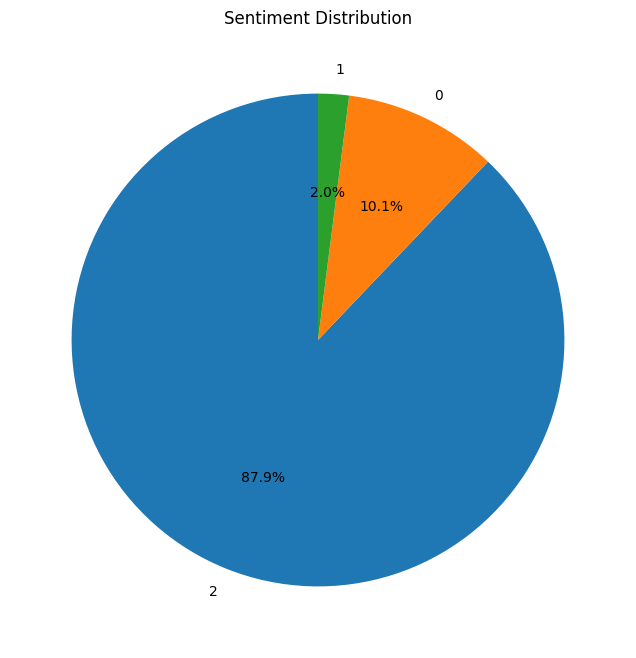

In [ ]:
# prompt: buatkan sebaran positif negatif netral dalam chart pie, netral 0, positif 2, negatif 1 berdasarkan pred label

# Calculate the count of each sentiment
sentiment_counts = df_sample['pred_label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()
